In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('StudentPerformanceFactors.csv')


In [ ]:
#Correlation entre les heures étudiées et le score à l'examen
plt.figure(figsize=(8, 6))
sns.regplot(
    x='Hours_Studied',
    y='Exam_Score',
    data=df,
    scatter_kws={'alpha': 0.5},  # transparence des points
    line_kws={'color': 'red'},   # couleur de la droite
    ci=95
)

# Titres et axes
plt.title('Corrélation entre les heures étudiées et le score à l\'examen')
plt.xlabel('Heures étudiées')
plt.ylabel('Score à l\'examen')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Affichage du graphique
plt.show()





C:\Users\user\AppData\Local\Temp\ipykernel_14064\3465205716.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attendance_Level', y='Exam_Score', data=df, palette='Set3')


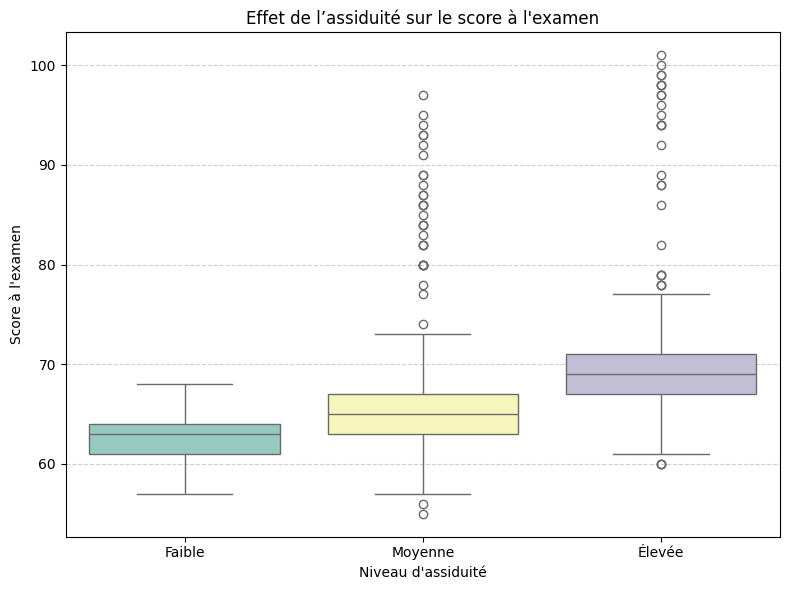

In [9]:


# Créer des tranches d'assiduité
bins = [0, 60, 80, 100]
labels = ['Faible', 'Moyenne', 'Élevée']
df['Attendance_Level'] = pd.cut(df['Attendance'], bins=bins, labels=labels, right=True)

# Visualisation : boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attendance_Level', y='Exam_Score', data=df, palette='Set3')

# Titres et axes
plt.title('Effet de l’assiduité sur le score à l\'examen')
plt.xlabel('Niveau d\'assiduité')
plt.ylabel('Score à l\'examen')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
